# Análisis de Red de Transporte Aéreo

In [1]:
using DelimitedFiles
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using LightGraphs

In [31]:
using StatsBase

### Se crea tabla de información con nodos y enlaces

In [39]:
#SE IMPORTA LA LISTA DE AEROLÍNEAS
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas.csv", ',', String);
lista_aerolineas = info_aerolineas[:, 2];

#### Número de nodos para cada red

Global 3072
Star Alliance 934
Sky Team 900
oneworld 698

#### Número de enlaces para cada red
Global 33093
Star Alliance 6553
Sky Team 5879
oneworld 3579

In [44]:
#NOMBRE DE LA AEROLÍNEA (ARCHIVO) ciclo for para todas las aerolíneas

tabla_info_net = ["Airline" "Nodes" "Links"]

for i in 2:5
    
    airline_code = lista_aerolineas[i] #Código
    aerolinea_matriz = string(airline_code, "_import_matrix.csv")
    leo_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/$airline_code/matriz/$aerolinea_matriz", Int64)
    nodos = size(leo_matriz)[1]
    enlaces = counts(leo_matriz)[2]
    renglon = [airline_code nodos enlaces]
    tabla_info_net = vcat(tabla_info_net, renglon)
    
end

return tabla_info_net 

5×3 Array{Any,2}:
 "Airline"            "Nodes"       "Links"
 "global"         3072         33093       
 "Star_Alliance"   934          6553       
 "Sky_Team"        900          5879       
 "oneworld"        698          3579       

#### Encontramos el número de nodos y enlaces para cada una de las redes.
#### Para los nodos, size(net_import_matrix) o length(net_airport_names)
#### Para los enlaces, counts(net_import_matrix)[2] nos da los enlaces
#### Junto la información de una misma red: airline, nodos, enlaces
#### Los junto en una tabla con join¿? de renglones

In [41]:
tabla_info_net

5×3 Array{Any,2}:
 "Airline"            "Nodes"       "Links"
 "global"         3072         33093       
 "Star_Alliance"   934          6553       
 "Sky_Team"        900          5879       
 "oneworld"        698          3579       

#### Similitud entre las redes. Coeficiente de Jaccard
$$ J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

#### Tabla de coeficientes de Jaccard respecto a la red global

In [71]:
j_nodo = []
j_enlace = []

j_nodo = push!(j_nodo, "Jaccard C. Nodes")
@show j_nodo
j_enlace = push!(j_enlace, "Jaccard C. Links")

k = 0

for i in 2:5
    @show i
    
    inters_nodo = abs(tabla_info_net[i, 2])    
    @show inters_nodo
    
    suma_nodo = abs(tabla_info_net[2, 2]) + abs(tabla_info_net[i, 2])
    @show suma_nodo
    jaccy_nodo = inters_nodo / (suma_nodo - inters_nodo)
    @show jaccy_nodo
    j_nodo = push!(j_nodo, jaccy_nodo)
    @show j_nodo
    
    inters_enlace = abs(tabla_info_net[i, 3])
    suma_enlace = abs(tabla_info_net[2, 3]) + abs(tabla_info_net[i, 3])
    jaccy_enlace = inters_enlace / (suma_enlace - inters_enlace)
    j_enlace = push!(j_enlace, jaccy_enlace)
    #@show j_enlace

end

return j_nodo, j_enlace

j_nodo = Any["Jaccard C. Nodes"]
i = 2
inters_nodo = 3072
suma_nodo = 6144
jaccy_nodo = 1.0
j_nodo = Any["Jaccard C. Nodes", 1.0]
i = 3
inters_nodo = 934
suma_nodo = 4006
jaccy_nodo = 0.3040364583333333
j_nodo = Any["Jaccard C. Nodes", 1.0, 0.304036]
i = 4
inters_nodo = 900
suma_nodo = 3972
jaccy_nodo = 0.29296875
j_nodo = Any["Jaccard C. Nodes", 1.0, 0.304036, 0.292969]
i = 5
inters_nodo = 698
suma_nodo = 3770
jaccy_nodo = 0.22721354166666666
j_nodo = Any["Jaccard C. Nodes", 1.0, 0.304036, 0.292969, 0.227214]


(Any["Jaccard C. Nodes", 1.0, 0.304036, 0.292969, 0.227214], Any["Jaccard C. Links", 1.0, 0.198018, 0.177651, 0.10815])

#### Distribución de grado de entrada

In [3]:
in_distrib_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_in_degree.csv", ',', Float64);
in_distrib_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_in_degree.csv", ',', Float64);
in_distrib_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_in_degree.csv", ',', Float64);
in_distrib_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_in_degree.csv", ',', Float64);

In [4]:
out_distrib_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/grados/global_distrib_out_degree.csv", ',', Float64);
out_distrib_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/grados/Star_Alliance_distrib_out_degree.csv", ',', Float64);
out_distrib_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/grados/oneworld_distrib_out_degree.csv", ',', Float64);
out_distrib_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/grados/Sky_Team_distrib_out_degree.csv", ',', Float64);

#### Gráficas de cobertura

In [72]:
layer_cov_G = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/global/cobertura/global_layer_coverage.csv", ',', Float64);
layer_cov_SA = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Star_Alliance/cobertura/Star_Alliance_layer_coverage.csv", ',', Float64);
layer_cov_OW = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/oneworld/cobertura/oneworld_layer_coverage.csv", ',', Float64);
layer_cov_ST = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/Sky_Team/cobertura/Sky_Team_layer_coverage.csv", ',', Float64);

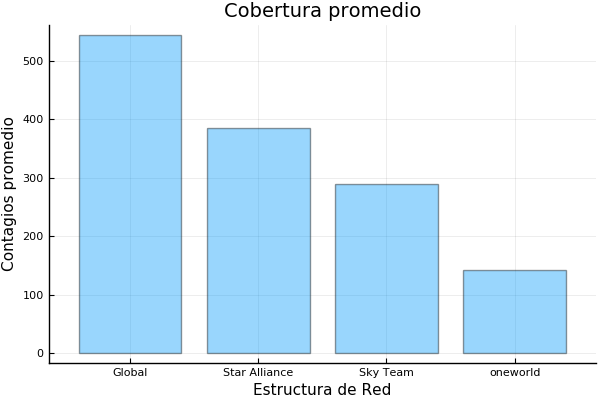

In [73]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [layer_cov_G[1], layer_cov_SA[1], layer_cov_ST[1], layer_cov_OW[1]]
b = bar(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

In [ ]:
x = ["Sano", "Contagiado"]
y = [2527.54, 544.46]
plot(x, y, title = "Global", l = 0.5, seriestype =:pie)

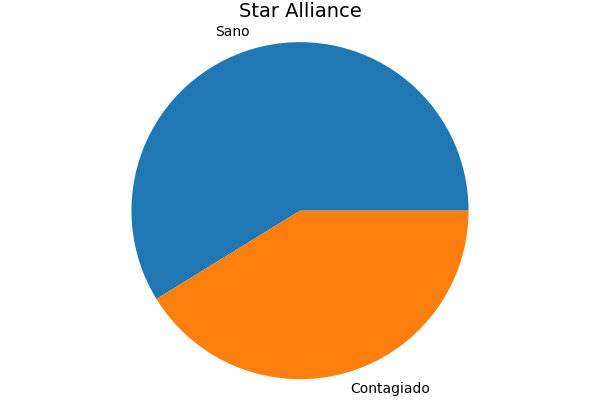

In [74]:
x = ["Sano", "Contagiado"]
y = [549.01, 384.99]
pie(x, y, title="Star Alliance", l=0.5)

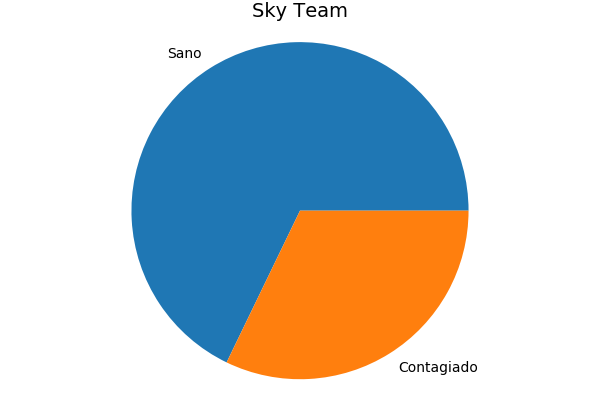

In [75]:
x = ["Sano", "Contagiado"]
y = [610.48, 289.52]
pie(x, y, title="Sky Team", l=0.5)

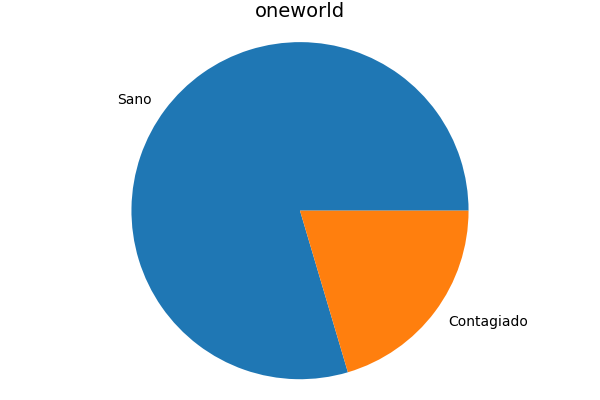

In [76]:
x = ["Sano", "Contagiado"]
y = [555.51, 142.49]
pie(x, y, title="oneworld", l=0.5)